# <center> Universidad Politécnica de Yucatán </center>
![logoupy](https://static.wixstatic.com/media/e16f80_45021b575f1c40cf9102e482464cb4ea~mv2_d_3000_2100_s_2.png/v1/fill/w_560,h_394,al_c,q_85,usm_0.66_1.00_0.01/e16f80_45021b575f1c40cf9102e482464cb4ea~mv2_d_3000_2100_s_2.webp)
## <center>Programming Paradigms </center>
## <center>Unit 2<br>  Evaluation </center>
### <center>Group: Data 3-A <br>Professor: Romeo De Coss Martinez</center>
### <center>Student: <br>Uicab Diaz Pedro Alejandro</center>
---

### Instrucctions

**Attributes:**

1. coef_: stores the coefficients obtained from the regression.


2. intercept_: stores the intercept of the obtained regression.


3. fit_intercept: stores whether or not the linear regression is forced to pass (0,0).


3. fitted_data: stores the data used for the fitting.


4. predicted_data: stores the data obtained from the prediction.


**Methods:**

1. fit: recieves two arguments (x and y) and fit the linear model to this data. Remember to store the input data.


2. predict: recieves one argument (x) and returns a prediction for each element based on the coefficients obtained in the fitting. Remember to store the obtained prediction.


3. plot_fitted: generates a scatter plot of the predicted values vs the real values of the fitting data. Recieves a boolean argument to choose wether to plot the reference line (y=x) or not.


4. plot_residuals: generates a scatter plot of the residuals (difference between the real value and the prediction) of the fitting data vs the predicted values.


5. r2_score: returns the R^2 metric for the fitted data.


6. rmse_score: returns the RMSE (Root Mean Squared Error) metric for the fitted data.


7. mae_score: returns the MAE (Mean Absolute Error) metric for the fitted data

---

In [1]:
# Imprt packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
class SimpleLinearRegresion():
    """
    This is a class which represent a simple linear regresion, it allows parameters such as
    
    Coef : stores the coefficients obtained from the regression.
    Intercept : stores the intercept of the obtained regression.
    Fit intercept: stores whether or not the linear regression is forced to pass (0,0).
    Fitted data: stores the data used for the fitting.
    Predicted data: stores the data obtained from the prediction.
    """
    def __init__(self, fit_intercept):
        """
        This methotd builts a new LinearRegresion class. Parameters:
        
        :param fit_intercept: one argument (True/False) to know whether linear 
         regression pass over (0,0) coordinate.
        :type fit_intercept: bool
        """
        self.Fit_inter = fit_intercept
        
        if type(self.Fit_inter) != bool:
            raise TypeError("Set Value Error: Type incompatible")
        
    def setFit(self, x, y,):
        """
        This method fits the linear regresion model. Parameters:
        
        :param x: x-axis values
        :typ x: numpy array
        :param y: y-axis values
        :type: numpy arra
        """
        
        self.X = x
        self.Y = y
        
        if self.X.size != self.Y.size:
             raise ValueError("Size array are not the same.")
        else:
            # Save the numpy array to fit data
            self.fitted_data = np.array([self.X,self.Y])
            
            # Computing Coeficients // Formula y = mx + b, where (m) is the slope and (b) is the intersection
            
            # Compute the sum of multiplication of each data 
            xy = sum(self.X * self.Y)
            # Compute the sum of each value to saquare
            x2 = sum(self.X **2)
            
            # Computing the coeficient (m) or slope
            self.Coef = ((self.X.size*xy.sum())-(self.X.sum()*self.Y.sum()))/((self.X.size*x2.sum())-((self.X.sum())**2))
            #Computing the intercept (b)
            self.Intercept = (self.Y.mean() - (self.Coef * self.X.mean()))
              
    def setPredict(self):
        """
        This method returns a prediction for a certain element based on the coefficients 
        obtained in the fitting. Parameters:
        
        Does not recieve parameters.
        """
        
        # Creating a new array to save the predicted data / NONE values
        self.Predicted = np.array([None] * self.Y.size)
            
        # If it is true we obligue to pass (0,0) point
        # If it is false we use the coef values to perform linear regresion model
        if(self.Fit_inter == True):
            for i in range(0,self.Y.size):
                self.Predicted[i] = self.Intercept + self.Coef*self.X[i]       
        else:
            for i in range(self.Y.size):
                self.Predicted[i] = 0 + self.Coef*self.X[i]
        
        print("Predicted Data:\n\n{}".format(self.Predicted))
    
    def setPlotFitted(self, reference_line):
        """
        This method generates a scatter plot of the predicted values vs the real values
        of the fitting data. Parameters:
        
        :param reference_line: one argument (True/False) to choose wether to plot 
         the reference line (y=x) or not.
        :type reference_line: bool
        """
        
        self.Rline = reference_line
        
        if type(self.Rline) != bool:
             raise TypeError("Set Value Error: Type incompatible")
        else:
            
            if self.Rline == True:
                
                # Create the plot with the reference line
                plt.scatter(self.Predicted,self.Y, color='purple', label='Data')
                plt.title("Predicted values vs The real values")
                plt.xlabel("Predicted value")
                plt.ylabel("Real values")
                plt.xlim(0,self.Predicted.max()+1)
                plt.ylim(0,self.Y.max()+1)
                plt.plot([self.Predicted.min(), self.Predicted.max()],[self.Y.min(),self.Y.max()], color= "Aqua", label = 'Fit')
                plt.tight_layout()
                plt.grid()
                plt.legend()
                plt.show()
            else:
                
                # Create the plot without reference line
                plt.scatter(self.Predicted,self.Y, color='purple', label='Data')
                plt.title("Predicted values vs The real values")
                plt.xlabel("Predicted value")
                plt.ylabel("Real values")
                plt.grid()
                plt.legend()
                plt.show()
    
    def setPlotResidual(self):
        """
        This method generates a scatter plot of the residuals 
        /difference between the real value and the prediction/. Parameters:
        
        Does not recieve parameters.
        """
        
        # Computing the residuals (difference between the real value and the prediction).
        self.Residuals = self.Y - self.Predicted
        print("Your values predicted are:\n",self.Residuals)
        
        # Plot
        plt.scatter(self.Predicted, self.Residuals, color='purple', label='Data')
        plt.title("Real value and The prediction")
        plt.xlabel("Predicted value")
        plt.ylabel("Residual")
        plt.hlines(0,self.Predicted.min(), self.Predicted.max(), color = "Orange", label ='Residual')
        plt.tight_layout()
        plt.grid()
        plt.legend()
        plt.show()
        
    
    def setR2score(self):
        """
        This method returns the R^2 metric for the fitted data. Parameters:
        
        Does not recieve parameters.
        """
        # Determination Coefficient 
        r2 = 1 - (sum(self.Residuals**2) / sum((self.Y - self.Y.mean())**2))
        
        return r2
    
    def setRMSE(self):
        """
        This method returns the RMSE (Root Mean Squared Error) metric for 
        the fitted data. Parameters:
        
        Does not recieve parameters.
        """
        # Root mean squared error
        rmse = np.sqrt((1/self.Y.size)*(sum(self.Residuals**2)))
        
        return rmse
    
    def setMAE(self):
        """
        This method returns the MAE (Mean Absolute Error) metric for the 
        fitted data. Parameters:
        
        Does not recieve parameters.
        """
        # Median Absolute Error
        mae = (1/self.Y.size) * (sum(abs(self.Residuals)))
        
        return mae
    

In [3]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
y = np.array([1,2,2,4,5,4,6,4,6,7,9,10,11,12,10])

model = SimpleLinearRegresion(True)

model.setFit(x,y)

In [4]:
model.setPredict()

Predicted Data:

[0.9500000000000002 1.7000000000000002 2.45 3.2 3.95 4.7 5.45 6.2 6.95 7.7
 8.45 9.2 9.95 10.7 11.45]


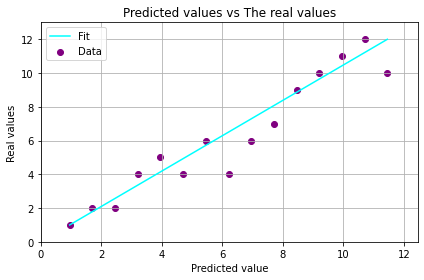

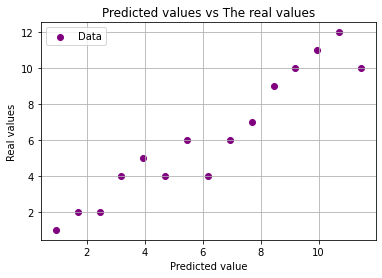

In [5]:
model.setPlotFitted(True)
model.setPlotFitted(False)

Your values predicted are:
 [0.04999999999999982 0.2999999999999998 -0.4500000000000002
 0.7999999999999998 1.0499999999999998 -0.7000000000000002
 0.5499999999999998 -2.2 -0.9500000000000002 -0.7000000000000002
 0.5500000000000007 0.8000000000000007 1.0500000000000007
 1.3000000000000007 -1.4499999999999993]


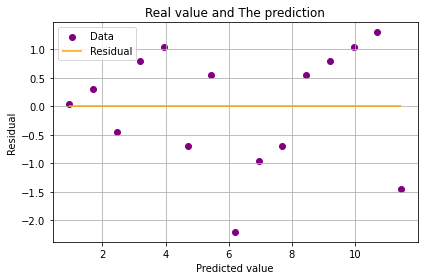

In [6]:
model.setPlotResidual()

In [7]:
model.setR2score()

0.9135730858468678

In [8]:
model.setRMSE()

0.9966610925150702

In [9]:
model.setMAE()

0.8600000000000001